# Langkah 1: Memahami Struktur Dataset
Asumsi Struktur Dataset
Setiap file (contoh: rakata6.xlsx) memiliki:

Kolom time_min (waktu dalam menit).
Kolom-kolom skenario: sc1, sc2, ..., sc1000 (tinggi gelombang untuk setiap skenario).
Tujuan:

Gabungkan data dari 6 stasiun berdasarkan skenario yang sama (sc1 dari semua stasiun, sc2 dari semua stasiun, dst.).
Buat dataset input-output untuk model.

# Penjelasan Stasiun
Stasiun 1: rakata6
Stasiun 2: sertung2
Stasiun 3: sertung3
Stasiun 4: panjang4
Stasiun 5: panjang5
Stasiun 6: rakata6

# Langkah 2: Membaca dan Memeriksa Dataset
Kode untuk Membaca Semua Dataset
Pertama, kita baca file dari 6 stasiun ke dalam Python, pastikan semuanya memiliki struktur yang sama.

In [1]:
import pandas as pd

# Daftar nama file stasiun
station_files = [
    r"C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\rakata1.xlsx",
    r"C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\sertung2.xlsx",
    r"C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\sertung3.xlsx",
    r"C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\panjang4.xlsx",
    r"C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\panjang5.xlsx",
    r"C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\rakata6.xlsx"
]

# Membaca file Excel ke dalam list
stations_data = [pd.read_excel(file) for file in station_files]

# Periksa contoh struktur data untuk stasiun pertama
print(stations_data[0].head())  # Menampilkan 5 baris pertama

   time_min        sc1        sc2        sc3        sc4        sc5        sc6  \
0         1  10.642390  10.642390  10.642390  10.642390  10.642390  10.642390   
1         2  10.642390  10.642390  10.642370  10.640505  10.642390  10.602007   
2         3  10.652604  10.180399  10.032238  10.290877  10.190292   9.429995   
3         4  11.583170  11.121240  11.818317  14.823345  15.477344  15.732861   
4         5  10.596855  10.212842  10.322562   9.494273   9.779640  11.416434   

         sc7        sc8        sc9  ...      sc991      sc992      sc993  \
0  10.642390  10.642390  10.642390  ...  10.642390  10.642390  10.642390   
1  10.642390  10.639954  10.642361  ...  10.512603   9.657396  10.641315   
2   9.882183   8.901776   9.400830  ...   8.203283   8.179588   9.923410   
3   8.106443  13.963904  13.416784  ...   7.840976  13.847435  11.067511   
4   9.768141  11.980138  11.038929  ...  10.272867  12.179972  11.460634   

       sc994      sc995      sc996      sc997      sc998

# Langkah 3: Memastikan Konsistensi Antar Stasiun
Kita harus memastikan semua file memiliki:

Kolom skenario yang sama (sc1, sc2, ..., sc1000).
Jumlah timestep yang sama (jumlah baris harus konsisten).

In [2]:
# Periksa konsistensi kolom skenario di semua stasiun
for i, data in enumerate(stations_data):
    print(f"Stasiun {i+1}: Kolom = {list(data.columns)}")
    print(f"Jumlah timestep: {data.shape[0]}")

Stasiun 1: Kolom = ['time_min', 'sc1', 'sc2', 'sc3', 'sc4', 'sc5', 'sc6', 'sc7', 'sc8', 'sc9', 'sc10', 'sc11', 'sc12', 'sc13', 'sc14', 'sc15', 'sc16', 'sc17', 'sc18', 'sc19', 'sc20', 'sc21', 'sc22', 'sc23', 'sc24', 'sc25', 'sc26', 'sc27', 'sc28', 'sc29', 'sc30', 'sc31', 'sc32', 'sc33', 'sc34', 'sc35', 'sc36', 'sc37', 'sc38', 'sc39', 'sc40', 'sc41', 'sc42', 'sc43', 'sc44', 'sc45', 'sc46', 'sc47', 'sc48', 'sc49', 'sc50', 'sc51', 'sc52', 'sc53', 'sc54', 'sc55', 'sc56', 'sc57', 'sc58', 'sc59', 'sc60', 'sc61', 'sc62', 'sc63', 'sc64', 'sc65', 'sc66', 'sc67', 'sc68', 'sc69', 'sc70', 'sc71', 'sc72', 'sc73', 'sc74', 'sc75', 'sc76', 'sc77', 'sc78', 'sc79', 'sc80', 'sc81', 'sc82', 'sc83', 'sc84', 'sc85', 'sc86', 'sc87', 'sc88', 'sc89', 'sc90', 'sc91', 'sc92', 'sc93', 'sc94', 'sc95', 'sc96', 'sc97', 'sc98', 'sc99', 'sc100', 'sc101', 'sc102', 'sc103', 'sc104', 'sc105', 'sc106', 'sc107', 'sc108', 'sc109', 'sc110', 'sc111', 'sc112', 'sc113', 'sc114', 'sc115', 'sc116', 'sc117', 'sc118', 'sc119', 'sc12

# Jika konsisten, kita bisa lanjut. Jika tidak, Anda harus memperbaiki dataset terlebih dahulu

# Langkah 4: Membuat Gabungan Data Multi-Stasiun
Untuk setiap skenario (sc1, sc2, ..., sc1000), gabungkan data dari semua stasiun berdasarkan waktu.

In [3]:
import numpy as np

# Parameter
input_seq_length = 3  # Panjang input sequence (contoh: 3 menit)
output_seq_length = 116  # Panjang output sequence (contoh: 116 menit)

# Preprocessing: Gabungkan data dari semua stasiun
all_X, all_y = [], []  # List untuk menyimpan input-output gabungan

# Iterasi untuk setiap skenario
for scenario in stations_data[0].columns[1:]:  # Kolom skenario (sc1, sc2, ..., sc1000)
    combined_inputs = []  # List untuk menyimpan data gabungan dari semua stasiun untuk skenario ini
    
    for station_data in stations_data:
        # Ambil data untuk skenario ini
        scenario_data = station_data[[scenario]].values  # Hanya kolom skenario
        combined_inputs.append(scenario_data)
    
    # Gabungkan data dari semua stasiun (dimensi: timesteps x jumlah stasiun)
    combined_inputs = np.hstack(combined_inputs)  # Gabungkan sepanjang axis 1 (fitur)

    # Buat sequence input-output
    for i in range(len(combined_inputs) - input_seq_length - output_seq_length):
        X_seq = combined_inputs[i:i+input_seq_length, :]  # Input: 3 menit, semua stasiun
        y_seq = combined_inputs[i+input_seq_length:i+input_seq_length+output_seq_length, 0]  # Output: 116 menit, pada stasiun pertama
        all_X.append(X_seq)
        all_y.append(y_seq)

# Konversi ke numpy array
all_X = np.array(all_X)  # Bentuk: (jumlah sampel, input_seq_length, jumlah stasiun)
all_y = np.array(all_y)  # Bentuk: (jumlah sampel, output_seq_length)

# Periksa bentuk data
print("Shape of all_X:", all_X.shape)  # Contoh: (10000, 3, 6)
print("Shape of all_y:", all_y.shape)  # Contoh: (10000, 116)

Shape of all_X: (1000, 3, 6)
Shape of all_y: (1000, 116)


# Penjelasan np.hstack dalam Langkah 4
np.hstack adalah fungsi di NumPy yang digunakan untuk menggabungkan array sepanjang sumbu horizontal (axis=1). Dalam konteks pengolahan data multi-stasiun di langkah 4, np.hstack digunakan untuk menggabungkan data dari beberapa stasiun menjadi satu array.

Mekanisme np.hstack
Sintaks:
python
Copy code
np.hstack((array1, array2, ...))
Parameter:
array1, array2, ...: Array yang akan digabungkan.
Semua array harus memiliki jumlah baris yang sama (atau ukuran yang sama di sumbu vertikal, axis=0).
Hasil:
Array baru dengan elemen-elemen dari array input digabungkan secara horizontal.
Contoh Sederhana
Misalkan Anda memiliki dua array berikut:


# Data dari dua stasiun
station1 = np.array([[0.1], [0.2], [0.3]])  # Data stasiun 1
station2 = np.array([[0.4], [0.5], [0.6]])  # Data stasiun 2

# Gabungkan dengan np.hstack
combined = np.hstack((station1, station2))
print(combined)

Output:

[[0.1 0.4]  # Baris pertama: Data dari stasiun 1 dan stasiun 2
 [0.2 0.5]  # Baris kedua: Data dari stasiun 1 dan stasiun 2
 [0.3 0.6]] # Baris ketiga: Data dari stasiun 1 dan stasiun 2
Interpretasi:
Setiap kolom dalam array hasil gabungan mewakili data dari satu stasiun.
Jumlah baris tetap sama, sedangkan jumlah kolom bertambah sesuai dengan jumlah array yang digabungkan.
Penggunaan np.hstack di Langkah 4
Dalam langkah 4, kita menggunakan np.hstack untuk menggabungkan data dari semua stasiun untuk satu skenario tertentu.

# Ambil data dari semua stasiun untuk satu skenario
combined_inputs = []  # Menyimpan data dari semua stasiun
for station_data in stations_data:
    scenario_data = station_data[[scenario]].values  # Data skenario dari satu stasiun
    combined_inputs.append(scenario_data)

# Gabungkan data dari semua stasiun (timesteps x jumlah stasiun)
combined_inputs = np.hstack(combined_inputs)
Mekanisme Kerja:
Ambil Data dari Satu Skenario:

Dari setiap file stasiun, kita ambil kolom untuk satu skenario tertentu (sc1, sc2, ..., sc1000).
Contoh untuk sc1:
station1_scenario = [[0.1], [0.2], [0.3]]  # Data dari stasiun 1
station2_scenario = [[0.4], [0.5], [0.6]]  # Data dari stasiun 2

Gabungkan Data dari Semua Stasiun:

Dengan np.hstack, data dari semua stasiun digabungkan menjadi array berbentuk (timesteps, jumlah_stasiun).

Contoh:
combined_inputs = np.hstack((station1_scenario, station2_scenario))

Output:
[[0.1 0.4]  # Baris pertama: Data dari stasiun 1 dan stasiun 2
 [0.2 0.5]  # Baris kedua: Data dari stasiun 1 dan stasiun 2
 [0.3 0.6]] # Baris ketiga: Data dari stasiun 1 dan stasiun 2
Hasil Akhir:

Setelah np.hstack, data dari semua stasiun untuk satu skenario tertentu sudah tergabung menjadi satu array.
Array ini digunakan untuk membentuk sequence input-output.
Keuntungan np.hstack

Menggabungkan Data Multi-Stasiun:
Setiap kolom hasil gabungan mewakili satu stasiun, sehingga model dapat belajar pola hubungan antar-stasiun.

Memastikan Data Konsisten:
Dengan np.hstack, semua data dari berbagai stasiun tetap tersinkronisasi berdasarkan waktu (time_min).

Kompatibilitas dengan Model:
Hasil dari np.hstack langsung kompatibel dengan format input model (samples, timesteps, features).

# Makna Dimensi Dataset
Shape of all_X: (1000, 3, 6)

1000: Jumlah sampel (kombinasi sequence input-output yang berhasil dibuat dari seluruh skenario dan timestep).
3: Panjang sequence input dalam timestep (dalam hal ini, 3 menit untuk input sequence).
6: Jumlah stasiun (fitur), karena dataset Anda berasal dari 6 stasiun berbeda.
Shape of all_y: (1000, 116)

1000: Jumlah sampel yang sama dengan all_X, memastikan setiap input memiliki pasangan output.
116: Panjang sequence output, yaitu jumlah menit prediksi untuk setiap sampel output.
Asal Usul Angka 1000 (Jumlah Sampel)
Jumlah sampel (1000) berasal dari potongan sequence input-output yang berhasil dibuat dari seluruh skenario (sc1 hingga sc1000) dan timestep di dalamnya.

Cara Menghitung Jumlah Sampel:
Setiap Skenario Diproses Secara Terpisah:

Untuk setiap skenario (misalnya sc1), Anda memotong data menjadi banyak pasangan input-output berdasarkan input_seq_length dan output_seq_length.
Jumlah Sampel Per Skenario:

Jika total jumlah timestep dalam skenario adalah T, maka jumlah pasangan input-output yang bisa dibuat adalah:

Jumlah Sampel per Skenario
=
𝑇
−
(
input_seq_length
+
output_seq_length
)
Jumlah Sampel per Skenario=T−(input_seq_length+output_seq_length)
Contoh: Jika T = 120 (120 menit data tersedia), input_seq_length = 3, dan output_seq_length = 116:

Jumlah Sampel per Skenario
=
120
−
(
3
+
116
)
=
1
Jumlah Sampel per Skenario=120−(3+116)=1
Total Jumlah Sampel:

Total jumlah sampel adalah hasil penjumlahan semua sampel yang dapat dibuat dari semua skenario (sc1, sc2, ..., sc1000).
Dalam kasus Anda, totalnya adalah 1000 sampel dari semua skenario.
Mengapa Jumlah Sampel Bukan 1000 Skenario?
Jumlah sampel (1000) menunjukkan jumlah potongan sequence input-output yang berhasil dibuat dari data, bukan jumlah total skenario.

Jumlah Skenario (1000):

Skenario adalah total eksperimen simulasi tsunami (sc1 hingga sc1000) yang tersedia.
Namun, tidak setiap skenario menghasilkan banyak sampel karena jumlah timestep yang tersedia mungkin terbatas untuk memenuhi panjang input_seq_length + output_seq_length.
Jumlah Sampel:

Hasil dari pemotongan sequence input-output dari semua skenario.


# sample_idx tidak sama dengan skenario (sc1, sc2, ..., sc1000). Berikut adalah penjelasannya:

Apa Itu sample_idx?

sample_idx adalah index dari sebuah sampel dalam dataset all_X dan all_y. Dataset ini dibuat setelah data dari semua skenario dan stasiun diolah menjadi pasangan input-output berdasarkan durasi waktu (sequence).
Setiap sampel adalah kombinasi data input dan output untuk sebuah skenario tertentu pada rentang waktu tertentu.
Bagaimana sample_idx Dibuat?
Saat kita memproses data untuk membuat all_X dan all_y, data dari setiap skenario (sc1, sc2, ..., sc1000) dibagi menjadi beberapa sequence input-output.

Contoh Ilustrasi:

1. Skenario sc1:

Jika Anda memiliki 120 menit data untuk sc1, dengan panjang input sequence 3 menit (input_seq_length = 3) dan panjang output sequence 116 menit (output_seq_length = 116), maka Anda dapat membuat:
Total 1 sampel untuk sc1.
Sampel ini disimpan dalam all_X dan all_y.

2. Skenario sc2:

Proses yang sama diterapkan untuk sc2:
Total 1 sampel juga dibuat untuk sc2.
Sampel ini juga disimpan dalam all_X dan all_y.

3. Dataset Gabungan:

Semua sampel dari semua skenario (sc1, sc2, ..., sc1000) digabungkan menjadi satu dataset.
Index sample_idx mengacu pada urutan sampel di dataset gabungan ini, bukan langsung pada skenario tertentu.

Apa Itu sc?
sc (skenario) adalah label unik untuk setiap simulasi, seperti sc1, sc2, ..., sc1000.
Setiap skenario mewakili hasil simulasi tertentu, dan di dalam satu skenario terdapat data untuk semua stasiun pada berbagai waktu (time_min).

Hubungan sample_idx dengan sc
sample_idx menunjuk ke satu sequence input-output tertentu dalam dataset gabungan (all_X, all_y).
sc adalah label skenario yang diproses untuk menghasilkan sequence input-output tersebut.
Jika Anda ingin mengetahui skenario (sc) mana yang terkait dengan sebuah sample_idx, Anda harus melacak asal usul data tersebut saat diproses. Misalnya, tambahkan informasi skenario saat membuat all_X dan all_y.



# Langkah untuk menyimpan dataset:  all_X dan all_y

In [4]:
import pandas as pd
import os

# Tentukan path penyimpanan
output_path = r"C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1"

# Buat folder jika belum ada
os.makedirs(output_path, exist_ok=True)

# Simpan all_X sebagai DataFrame
all_X_flattened = all_X.reshape(all_X.shape[0], -1)  # Flatten untuk menyimpan dalam bentuk 2D
all_X_df = pd.DataFrame(all_X_flattened)
all_X_file = os.path.join(output_path, 'all_X_dataset.csv')
all_X_df.to_csv(all_X_file, index=False)

# Simpan all_y sebagai DataFrame
all_y_df = pd.DataFrame(all_y)
all_y_file = os.path.join(output_path, 'all_y_dataset.csv')
all_y_df.to_csv(all_y_file, index=False)

print(f"Dataset berhasil disimpan:\n- {all_X_file}\n- {all_y_file}")

Dataset berhasil disimpan:
- C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1\all_X_dataset.csv
- C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1\all_y_dataset.csv


# Penjelasan dataset gabungan (all_x dan all_y)

1. all_X_dataset.csv (Dataset Input)

-Isi:
File ini berisi data input sequence untuk melatih model Anda.

Setiap baris dalam file ini adalah satu sampel input, yang terdiri dari data gabungan dari beberapa stasiun selama durasi input tertentu (misalnya, 3 menit).


-Kolom-kolomnya merepresentasikan:

Waktu (time steps): Kolom secara berurutan untuk durasi input (misalnya, 3 timestep).

Stasiun (stations): Data dari semua stasiun untuk setiap timestep.

Jika Anda memiliki 6 stasiun dan durasi input 3 menit, maka akan ada 6 * 3 = 18 kolom.

-Dimensi:
Jumlah baris: Jumlah sampel input yang dihasilkan.
Jumlah kolom: input_seq_length * jumlah_stasiun.

2. all_y_dataset.csv (Dataset Output)

Isi:
File ini berisi data output sequence atau target untuk melatih model Anda.
Setiap baris dalam file ini adalah target sequence untuk satu sampel input.
Data output hanya berasal dari satu stasiun (misalnya, stasiun pertama) dan mencakup durasi output tertentu (misalnya, 116 menit).

Dimensi:
Jumlah baris: Sama dengan jumlah baris di all_X_dataset.csv (jumlah sampel input).
Jumlah kolom: Panjang output sequence (output_seq_length, misalnya 116 menit).

3. Hubungan Antara all_X_dataset.csv dan all_y_dataset.csv

Baris yang Sama:
Baris ke-1 di all_X_dataset.csv adalah input untuk menghasilkan baris ke-1 di all_y_dataset.csv.
Baris ke-2 di all_X_dataset.csv adalah input untuk menghasilkan baris ke-2 di all_y_dataset.csv.
Dan seterusnya.

Dimensi yang Sesuai:
Jumlah baris di kedua file selalu sama karena setiap sampel input memiliki pasangan output.

4. Penggunaan

Latih Model:
Gunakan all_X_dataset.csv sebagai input (X) untuk model Anda.
Gunakan all_y_dataset.csv sebagai output (y) untuk model Anda.

Evaluasi:
Model akan memprediksi output berdasarkan input dari all_X_dataset.csv.
Anda dapat membandingkan hasil prediksi dengan data aktual di all_y_dataset.csv.

Visualisasi:
Anda dapat memvisualisasikan data dari kedua file untuk memeriksa hubungan antara input dan output.


# Contoh Visualisasi Dataset
Untuk lebih memahami, mari kita lihat data input-output untuk satu sampel

In [5]:
# Contoh sampel pertama
print("Input pertama (all_X[0]):")
print(all_X[0])  # Bentuk: (3, 6) -> 3 timestep, 6 stasiun

print("\nOutput pertama (all_y[0]):")
print(all_y[0])  # Bentuk: (116,) -> 116 menit prediksi untuk stasiun pertama

Input pertama (all_X[0]):
[[10.64239     6.29286     0.          0.06457     0.18247     9.80748   ]
 [10.64239     6.29286     0.          0.06613534  0.26484174  9.80748   ]
 [10.65260401  6.29286     0.          0.9928971   1.34386384 10.02290943]]

Output pertama (all_y[0]):
[11.58317003 10.59685479 10.21697375 10.35873522 10.42933034 11.09310476
 10.32112223 10.63967783 10.49846527 10.57817136 10.69734374 10.32221172
 10.77501763 10.8857623  10.50303809 10.47044803 10.62384152 10.75142852
 10.63733499 10.53731263 10.62452185 10.70731579 10.58454081 10.66568087
 10.61177458 10.63289691 10.65852617 10.56835613 10.6276602  10.6079578
 10.63218883 10.49034436 10.62481769 10.62019383 10.66249974 10.69902159
 10.62219013 10.69961402 10.61171264 10.59910739 10.65822764 10.64783728
 10.64541086 10.69997191 10.59826994 10.58889862 10.69873896 10.59973558
 10.57908302 10.58992851 10.52335891 10.66278664 10.60450603 10.6400143
 10.65622679 10.6184817  10.6328212  10.63930134 10.67407886 10.7

# Langkah 5: Visualisasi Data Gabungan
Plot Input Data dari Satu Skenario
Plotkan data dari 6 stasiun untuk 1 sampel.

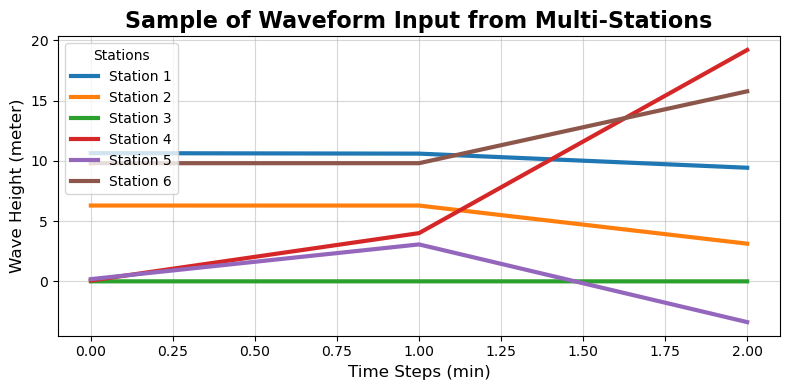

Plot saved to C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1\Sample of input Data from Multi-Stations-sta1.png


In [6]:
import matplotlib.pyplot as plt

# Pilih sampel pertama
sample_idx = 5  # Pilih sample index
timesteps = range(input_seq_length)  # Rentang waktu

# Plot data dari semua stasiun
plt.figure(figsize=(8, 4))  # Lebar 12 inch, tinggi 4 inch
for feature_idx in range(all_X.shape[2]):  # Iterasi setiap stasiun
    plt.plot(
        timesteps,
        all_X[sample_idx, :, feature_idx],
        label=f"Station {feature_idx+1}",
        linewidth=3 # Garis lebih tebal
    )

# Tambahkan elemen visualisasi
plt.title("Sample of Waveform Input from Multi-Stations", fontsize=16, fontweight='bold')  # Judul
plt.xlabel("Time Steps (min)", fontsize=12)  # Label x
plt.ylabel("Wave Height (meter)", fontsize=12)  # Label y
plt.xticks(fontsize=10)  # Ukuran ticks x
plt.yticks(fontsize=10)  # Ukuran ticks y
plt.legend(loc='upper left', fontsize=10, title="Stations")  # Legend
plt.grid(alpha=0.5)  # Grid
plt.tight_layout()  # Tata letak rapi

# Simpan plot ke path yang ditentukan
output_path = r"C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1\Sample of input Data from Multi-Stations-sta1.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Resolusi 300 DPI
plt.show()

print(f"Plot saved to {output_path}")

# Plot Output Data
Plotkan output target dari stasiun pertama.

# Plot Output
Ubah nilai sample_idx ke nomor sampel yang ingin Anda plot

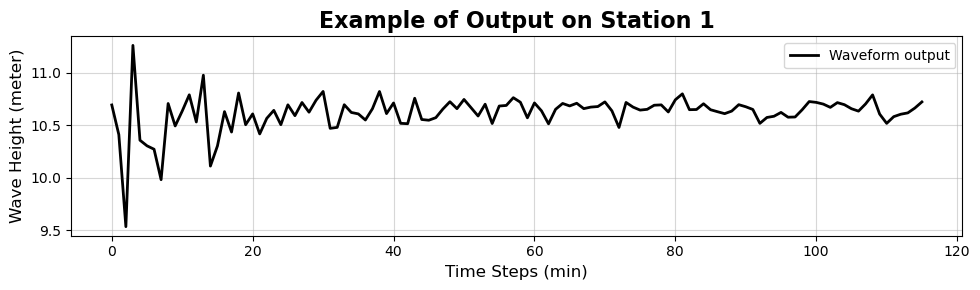

Plot saved to C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1\Target Output (Station 1).png


In [7]:
import matplotlib.pyplot as plt

# Pilih sample index untuk plot
sample_idx = 40  # Contoh, gunakan sampel pertama
output_timesteps = range(output_seq_length)  # Rentang waktu untuk output

# Plot output target untuk sampel tertentu
plt.figure(figsize=(10, 3))  # Ukuran plot: lebar 10 inch, tinggi 5 inch
plt.plot(
    output_timesteps,
    all_y[sample_idx],
    label="Waveform output",
    color="black",  # Warna garis
    linewidth=2  # Ketebalan garis
)

# Tambahkan elemen visualisasi
plt.title("Example of Output on Station 1", fontsize=16, fontweight='bold')  # Judul plot
plt.xlabel("Time Steps (min)", fontsize=12)  # Label x
plt.ylabel("Wave Height (meter)", fontsize=12)  # Label y
plt.xticks(fontsize=10)  # Ukuran ticks x}
plt.yticks(fontsize=10)  # Ukuran ticks y
plt.legend(loc='upper right', fontsize=10)  # Legend
plt.grid(alpha=0.5)  # Tambahkan grid dengan transparansi

# Tata letak rapi
plt.tight_layout()

# Simpan plot ke path yang ditentukan
output_path = r"C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1\Target Output (Station 1).png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Simpan gambar dengan resolusi tinggi
plt.show()

print(f"Plot saved to {output_path}")

# Langkah 6: Latih Model
Gunakan dataset all_X dan all_y untuk melatih model.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Reshape

# Asumsi: all_X, all_y sudah didefinisikan sebelumnya
# Tambahkan daftar skenario untuk semua data
scenario_ids = [f"sc{i+1}" for i in range(len(all_X))]  # Contoh: ["sc1", "sc2", ..., "sc1000"]

# Split dataset menjadi training dan testing (termasuk ID skenario)
X_train, X_test, y_train, y_test, scenario_ids_train, scenario_ids_test = train_test_split(
    all_X, all_y, scenario_ids, test_size=0.2, random_state=42
)

# Model Multi-Stasiun
model = Sequential([
    Bidirectional(LSTM(64, activation='relu', return_sequences=False), input_shape=(input_seq_length, all_X.shape[2])),
    Dense(output_seq_length, activation='linear')
])
model.compile(optimizer='adam', loss='mse')

# Latih model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/500
20/20 [==============================] - 2s 19ms/step - loss: 95.1863 - val_loss: 62.3450
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 24.2204 - val_loss: 4.1826
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 3.0452 - val_loss: 1.8734
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 1.4871 - val_loss: 1.1952
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 1.0555 - val_loss: 0.9289
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.8401 - val_loss: 0.7649
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6861 - val_loss: 0.6526
Epoch 8/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5847 - val_loss: 0.5592
Epoch 9/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5091 - val_loss: 0.5034
Epoch 10/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4511 - val_loss: 0.4525
Epoch

Epoch 83/500
20/20 [==============================] - 0s 4ms/step - loss: 0.1167 - val_loss: 0.1498
Epoch 84/500
20/20 [==============================] - 0s 4ms/step - loss: 0.1169 - val_loss: 0.1459
Epoch 85/500
20/20 [==============================] - 0s 4ms/step - loss: 0.1180 - val_loss: 0.1470
Epoch 86/500
20/20 [==============================] - 0s 4ms/step - loss: 0.1161 - val_loss: 0.1442
Epoch 87/500
20/20 [==============================] - 0s 4ms/step - loss: 0.1132 - val_loss: 0.1434
Epoch 88/500
20/20 [==============================] - 0s 4ms/step - loss: 0.1138 - val_loss: 0.1444
Epoch 89/500
20/20 [==============================] - 0s 4ms/step - loss: 0.1148 - val_loss: 0.1465
Epoch 90/500
20/20 [==============================] - 0s 4ms/step - loss: 0.1135 - val_loss: 0.1444
Epoch 91/500
20/20 [==============================] - 0s 4ms/step - loss: 0.1125 - val_loss: 0.1446
Epoch 92/500
20/20 [==============================] - 0s 4ms/step - loss: 0.1143 - val_loss: 0.1431


20/20 [==============================] - 0s 6ms/step - loss: 0.0934 - val_loss: 0.1324
Epoch 165/500
20/20 [==============================] - 0s 7ms/step - loss: 0.0970 - val_loss: 0.1394
Epoch 166/500
20/20 [==============================] - 0s 6ms/step - loss: 0.0963 - val_loss: 0.1342
Epoch 167/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0933 - val_loss: 0.1346
Epoch 168/500
20/20 [==============================] - 0s 8ms/step - loss: 0.0932 - val_loss: 0.1369
Epoch 169/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0920 - val_loss: 0.1318
Epoch 170/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0920 - val_loss: 0.1316
Epoch 171/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0956 - val_loss: 0.1407
Epoch 172/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0927 - val_loss: 0.1337
Epoch 173/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0948 - val_loss: 0.1353
Epoc

20/20 [==============================] - 0s 5ms/step - loss: 0.0791 - val_loss: 0.1273
Epoch 246/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0790 - val_loss: 0.1273
Epoch 247/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0783 - val_loss: 0.1263
Epoch 248/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0787 - val_loss: 0.1275
Epoch 249/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0775 - val_loss: 0.1289
Epoch 250/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0773 - val_loss: 0.1304
Epoch 251/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0791 - val_loss: 0.1300
Epoch 252/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0810 - val_loss: 0.1357
Epoch 253/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0792 - val_loss: 0.1299
Epoch 254/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0823 - val_loss: 0.1317
Epoc

20/20 [==============================] - 0s 5ms/step - loss: 0.0727 - val_loss: 0.1307
Epoch 327/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0740 - val_loss: 0.1320
Epoch 328/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0746 - val_loss: 0.1290
Epoch 329/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0743 - val_loss: 0.1272
Epoch 330/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0852 - val_loss: 0.1312
Epoch 331/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0794 - val_loss: 0.1260
Epoch 332/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0705 - val_loss: 0.1349
Epoch 333/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0730 - val_loss: 0.1324
Epoch 334/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0751 - val_loss: 0.1306
Epoch 335/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0722 - val_loss: 0.1258
Epoc

20/20 [==============================] - 0s 5ms/step - loss: 0.0639 - val_loss: 0.1269
Epoch 408/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0652 - val_loss: 0.1288
Epoch 409/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0672 - val_loss: 0.1314
Epoch 410/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0656 - val_loss: 0.1277
Epoch 411/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0634 - val_loss: 0.1331
Epoch 412/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0647 - val_loss: 0.1311
Epoch 413/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0652 - val_loss: 0.1288
Epoch 414/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0658 - val_loss: 0.1291
Epoch 415/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0644 - val_loss: 0.1272
Epoch 416/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0641 - val_loss: 0.1309
Epoc

20/20 [==============================] - 0s 4ms/step - loss: 0.0605 - val_loss: 0.1359
Epoch 489/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0603 - val_loss: 0.1325
Epoch 490/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0608 - val_loss: 0.1271
Epoch 491/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0588 - val_loss: 0.1278
Epoch 492/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0600 - val_loss: 0.1315
Epoch 493/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0609 - val_loss: 0.1316
Epoch 494/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0604 - val_loss: 0.1341
Epoch 495/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0604 - val_loss: 0.1329
Epoch 496/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0593 - val_loss: 0.1307
Epoch 497/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0600 - val_loss: 0.1289
Epoc

# Cek Isi scenario_ids_test
Gunakan perintah print() untuk melihat daftar skenario di dataset testing:

In [9]:
# Print semua skenario di test dataset
print("Skenario di dataset testing:")
print(set(scenario_ids_test))  # Menggunakan `set` untuk menghilangkan duplikasi

Skenario di dataset testing:
{'sc678', 'sc555', 'sc903', 'sc750', 'sc222', 'sc26', 'sc979', 'sc590', 'sc278', 'sc949', 'sc943', 'sc73', 'sc87', 'sc102', 'sc650', 'sc679', 'sc311', 'sc937', 'sc255', 'sc999', 'sc463', 'sc653', 'sc527', 'sc925', 'sc627', 'sc440', 'sc827', 'sc315', 'sc487', 'sc860', 'sc605', 'sc584', 'sc987', 'sc364', 'sc383', 'sc282', 'sc522', 'sc645', 'sc690', 'sc480', 'sc669', 'sc622', 'sc140', 'sc260', 'sc571', 'sc55', 'sc618', 'sc67', 'sc978', 'sc738', 'sc276', 'sc591', 'sc77', 'sc600', 'sc200', 'sc803', 'sc900', 'sc960', 'sc915', 'sc366', 'sc199', 'sc412', 'sc11', 'sc893', 'sc942', 'sc437', 'sc430', 'sc261', 'sc333', 'sc768', 'sc45', 'sc328', 'sc867', 'sc636', 'sc24', 'sc850', 'sc245', 'sc452', 'sc698', 'sc320', 'sc137', 'sc688', 'sc300', 'sc585', 'sc216', 'sc290', 'sc500', 'sc79', 'sc550', 'sc372', 'sc715', 'sc295', 'sc824', 'sc821', 'sc121', 'sc996', 'sc56', 'sc31', 'sc560', 'sc299', 'sc549', 'sc494', 'sc310', 'sc248', 'sc884', 'sc322', 'sc40', 'sc885', 'sc528', 's

# Simpan Daftar Skenario Testing ke File
Jika ingin menyimpan daftar skenario ke file untuk dokumentasi:

In [10]:
# Simpan skenario ke file
output_scenario_file = r"C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1\test_scenarios.txt"
with open(output_scenario_file, 'w') as f:
    for scenario in sorted(set(scenario_ids_test)):
        f.write(scenario + '\n')

print(f"Daftar skenario testing disimpan di {output_scenario_file}")

Daftar skenario testing disimpan di C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1\test_scenarios.txt


# Cek Jumlah Sampel Per Skenario
Untuk melihat jumlah sampel yang digunakan untuk setiap skenario di test dataset:

In [11]:
import pandas as pd

# Hitung jumlah sampel per skenario
scenario_count = pd.Series(scenario_ids_test).value_counts()

# Print jumlah sampel per skenario
print("Jumlah sampel per skenario di test dataset:")
print(scenario_count)

# Simpan ke file CSV
scenario_count.to_csv(r"C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1\test_scenario_counts.csv")
print("Jumlah sampel per skenario disimpan ke file CSV.")

Jumlah sampel per skenario di test dataset:
sc522    1
sc216    1
sc446    1
sc868    1
sc801    1
        ..
sc544    1
sc108    1
sc494    1
sc591    1
sc79     1
Name: count, Length: 200, dtype: int64
Jumlah sampel per skenario disimpan ke file CSV.


# Plot training loss dan validation loss

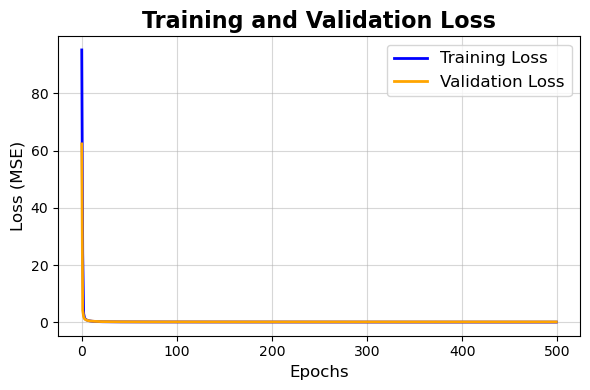

Training loss plot saved to C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1\training_loss_plot.png


In [12]:
plt.figure(figsize=(6, 4))  # Ukuran plot
plt.plot(
    history.history['loss'],
    label='Training Loss',
    color='blue',
    linewidth=2  # Ketebalan garis
)
plt.plot(
    history.history['val_loss'],
    label='Validation Loss',
    color='orange',
    linewidth=2  # Ketebalan garis
)

# Tambahkan elemen visualisasi
plt.title("Training and Validation Loss", fontsize=16, fontweight='bold')  # Judul plot
plt.xlabel("Epochs", fontsize=12)  # Label sumbu x
plt.ylabel("Loss (MSE)", fontsize=12)  # Label sumbu y
plt.xticks(fontsize=10)  # Ukuran ticks x
plt.yticks(fontsize=10)  # Ukuran ticks y
plt.legend(loc='upper right', fontsize=12)  # Legend dengan judul
plt.grid(alpha=0.5)  # Tambahkan grid

# Tata letak rapi
plt.tight_layout()

# Simpan plot ke file
output_path = r"C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1\training_loss_plot.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Simpan gambar dengan resolusi tinggi
plt.show()

print(f"Training loss plot saved to {output_path}")

# Langkah 7: Evaluasi Model
Setelah melatih model, langkah berikutnya adalah mengevaluasi performa pada dataset testing (X_test, y_test).

# Hitung Error dan Metode Evaluasi
Visualisasikan distribusi error untuk seluruh dataset testing.

Gunakan metrik seperti Mean Squared Error (MSE) dan Mean Absolute Error (MAE) dan RMSE.

7/7 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.1058
Mean Absolute Error (MAE): 0.1493
Root Mean Squared Error (RMSE): 0.3253


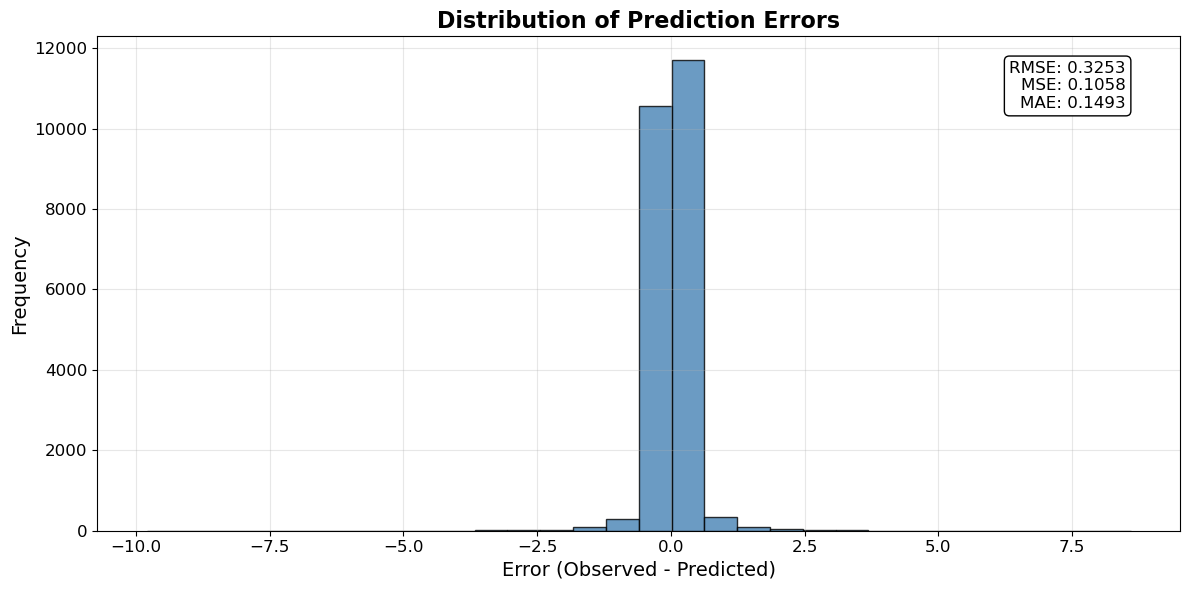

Error distribution plot saved to C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1\error_distribution_with_rmse.png


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prediksi pada dataset testing
y_pred = model.predict(X_test)

# Hitung metrik error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Hitung RMSE

# Print metrik error ke konsol
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Hitung error untuk setiap timestep
errors = y_test - y_pred

# Plot distribusi error
plt.figure(figsize=(12, 6))  # Ukuran figure lebih lebar untuk visualisasi lebih nyaman
plt.hist(
    errors.flatten(), 
    bins=30, 
    color='steelblue',       # Gunakan warna yang lebih menarik
    edgecolor='black',       # Tambahkan tepi hitam untuk setiap bin
    alpha=0.8                # Transparansi untuk tampilan lebih halus
)

# Tambahkan informasi RMSE pada plot
plt.title("Distribution of Prediction Errors", fontsize=16, fontweight='bold')  # Tambahkan judul lebih jelas
plt.xlabel("Error (Observed - Predicted)", fontsize=14)  # Label x lebih besar
plt.ylabel("Frequency", fontsize=14)  # Label y lebih besar
plt.xticks(fontsize=12)  # Ukuran font ticks x
plt.yticks(fontsize=12)  # Ukuran font ticks y
plt.grid(alpha=0.3)  # Tambahkan grid dengan transparansi untuk membantu pembacaan
plt.text(
    0.95, 0.95, 
    f"RMSE: {rmse:.4f}\nMSE: {mse:.4f}\nMAE: {mae:.4f}", 
    transform=plt.gca().transAxes, 
    fontsize=12, 
    color='black',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'), 
    ha='right', 
    va='top'
)  # Posisi di dalam plot, relatif ke sumbu

plt.tight_layout()  # Tata letak rapi untuk menghindari overlap

# Simpan plot ke file
output_path = r"C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1\error_distribution_with_rmse.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Simpan gambar dengan resolusi tinggi
plt.show()

print(f"Error distribution plot saved to {output_path}")

Penggunaan Mean Squared Error (MSE) dan Mean Absolute Error (MAE) dalam evaluasi model prediksi seperti ini memiliki alasan yang kuat, terutama karena sifat metrik ini sesuai dengan jenis data dan tujuan evaluasi. Berikut penjelasan mengapa MSE dan MAE digunakan:

1. Mean Squared Error (MSE)
Definisi:
MSE
=
1
𝑛
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
𝑦
^
𝑖
)
2
MSE= 
n
1
​
  
i=1
∑
n
​
 (y 
i
​
 − 
y
^
​
  
i
​
 ) 
2
 
Di mana 
𝑦
𝑖
y 
i
​
  adalah nilai observasi (aktual), dan 
𝑦
^
𝑖
y
^
​
  
i
​
  adalah nilai prediksi.
Mengapa Menggunakan MSE?
Sensitif terhadap Error Besar:

Karena MSE menghitung kuadrat error, metrik ini sangat sensitif terhadap error besar. Artinya:
Jika model membuat kesalahan besar (outlier), MSE akan memberikan penalti yang lebih besar.
Hal ini penting dalam konteks prediksi tsunami karena error besar dalam estimasi tinggi gelombang dapat memiliki konsekuensi signifikan (misalnya, salah prediksi pada tinggi gelombang yang sangat tinggi atau sangat rendah).
Mengutamakan Error Kecil:

Dengan penalti kuadrat, model cenderung lebih fokus untuk meminimalkan error kecil, sehingga menghasilkan prediksi yang lebih akurat secara keseluruhan.
Matematis Stabil:

MSE menghasilkan fungsi loss yang diferensial secara halus, yang membuatnya cocok untuk optimasi model berbasis gradient descent seperti yang digunakan di model Anda.
Kelemahan MSE:
Sensitif terhadap outlier:
Jika ada error besar yang tidak biasa (outlier), MSE bisa terdistorsi karena penalti kuadratnya.
2. Mean Absolute Error (MAE)
Definisi:
MAE
=
1
𝑛
∑
𝑖
=
1
𝑛
∣
𝑦
𝑖
−
𝑦
^
𝑖
∣
MAE= 
n
1
​
  
i=1
∑
n
​
 ∣y 
i
​
 − 
y
^
​
  
i
​
 ∣
Di mana 
𝑦
𝑖
y 
i
​
  adalah nilai observasi (aktual), dan 
𝑦
^
𝑖
y
^
​
  
i
​
  adalah nilai prediksi.
Mengapa Menggunakan MAE?
Tidak Terlalu Sensitif terhadap Outlier:

MAE menghitung magnitudo error tanpa mengkuadratkan. Hal ini membuat MAE lebih robust terhadap outlier dibandingkan MSE.
Dalam konteks prediksi tsunami, jika ada beberapa prediksi dengan error besar, MAE tetap memberikan gambaran rata-rata error yang lebih stabil.
Interpretasi Lebih Mudah:

MAE memberikan nilai rata-rata error dalam satuan yang sama dengan data (misalnya, meter dalam kasus tinggi gelombang tsunami), sehingga lebih mudah dipahami.
Mengukur Error Absolut:

MAE adalah metrik yang sederhana namun efektif untuk memberikan gambaran langsung tentang sejauh mana prediksi model menyimpang dari nilai aktual.
Kelemahan MAE:
Tidak memberikan penalti tambahan untuk error besar.
Jika error besar terjadi, MAE tidak memberikan insentif bagi model untuk memperbaikinya secara signifikan.

# Langkah 8: Visualisasi Hasil Prediksi
Plot Hasil Prediksi vs Data Observasi
Lakukan visualisasi untuk melihat bagaimana hasil prediksi dibandingkan dengan data observasi.

Plot untuk Satu Sampel

# Plot untuk Beberapa Sampel
Jika ingin memvisualisasikan lebih dari satu sampel:

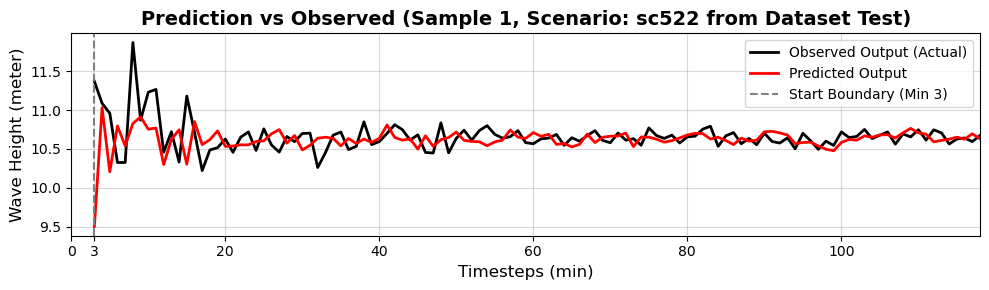

Sample 1 corresponds to scenario: sc522


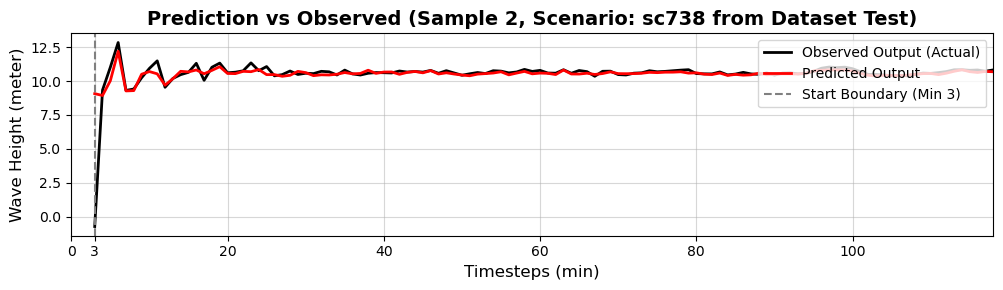

Sample 2 corresponds to scenario: sc738


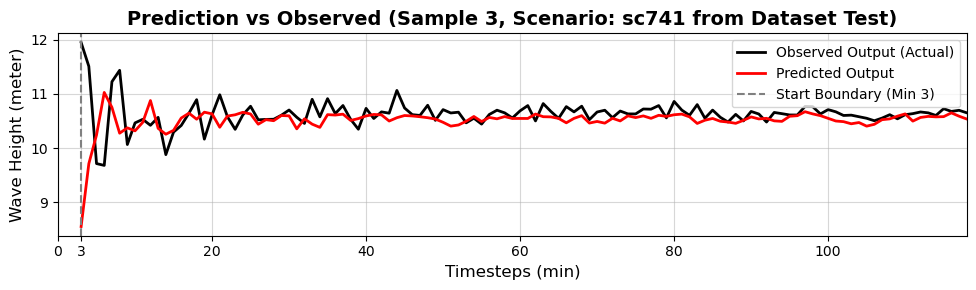

Sample 3 corresponds to scenario: sc741


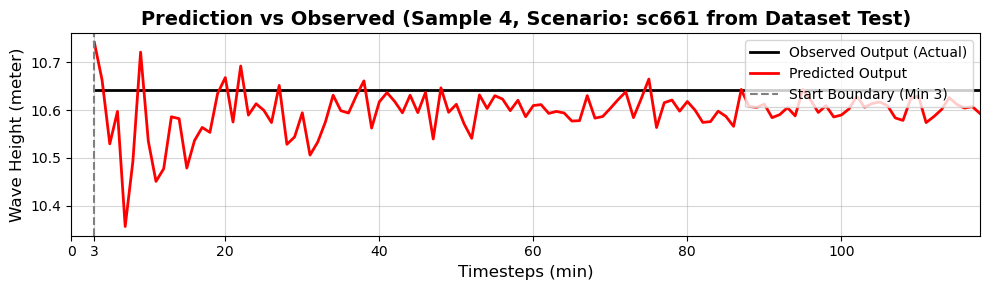

Sample 4 corresponds to scenario: sc661


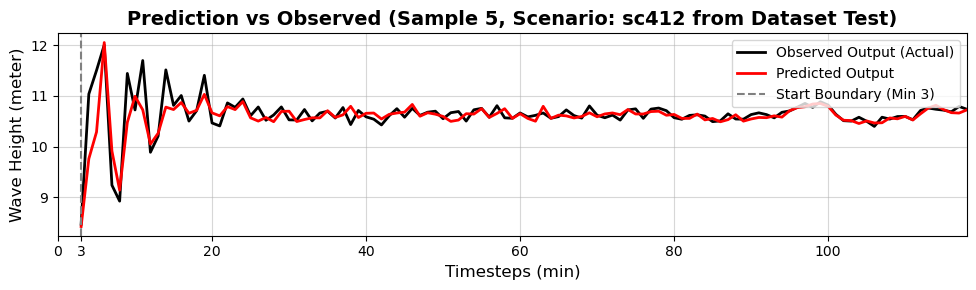

Sample 5 corresponds to scenario: sc412


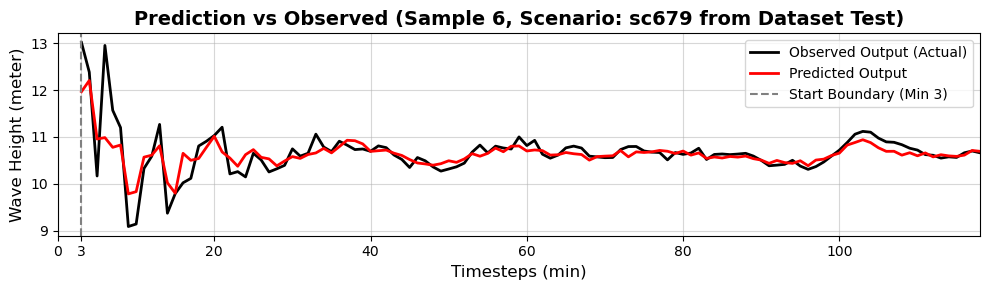

Sample 6 corresponds to scenario: sc679


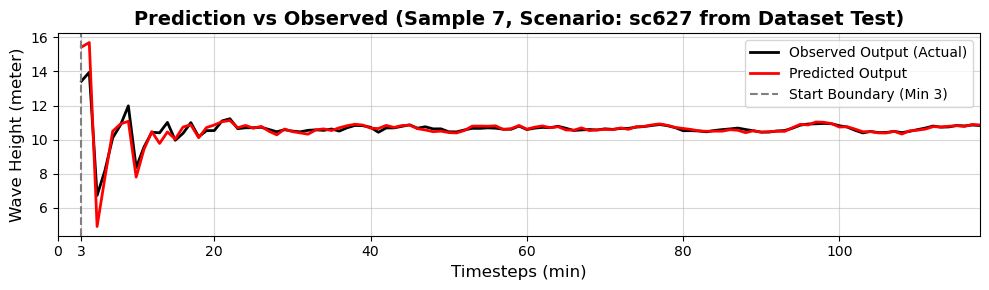

Sample 7 corresponds to scenario: sc627


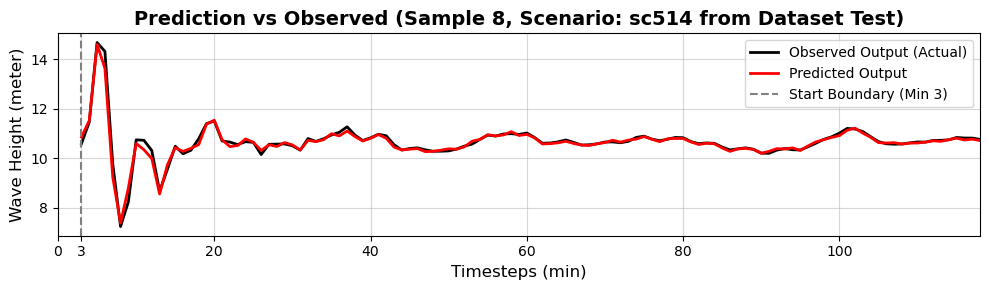

Sample 8 corresponds to scenario: sc514


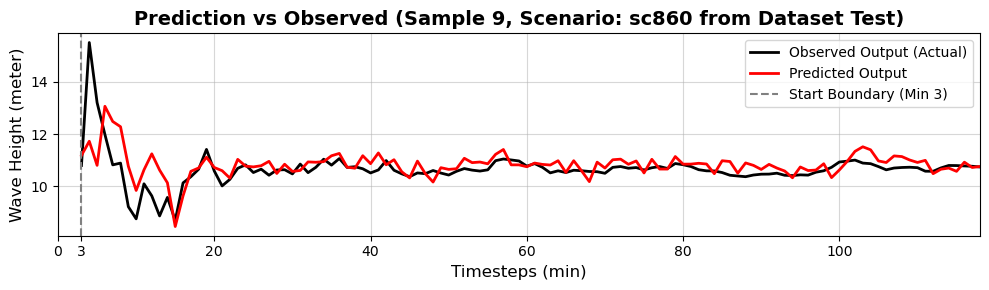

Sample 9 corresponds to scenario: sc860


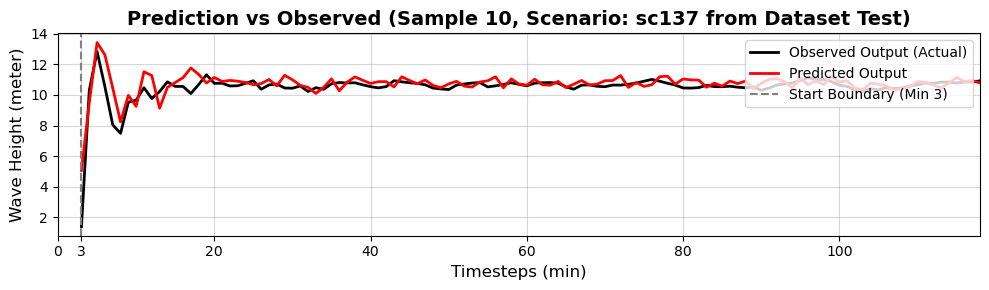

Sample 10 corresponds to scenario: sc137


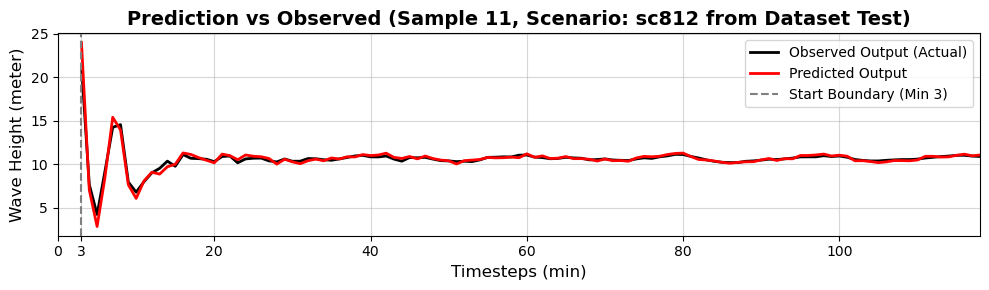

Sample 11 corresponds to scenario: sc812


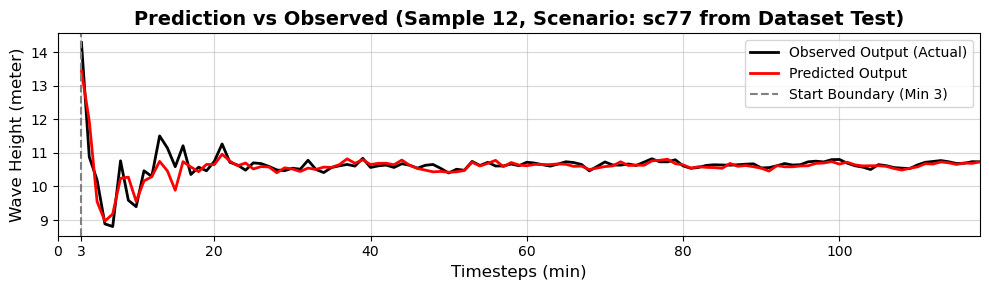

Sample 12 corresponds to scenario: sc77


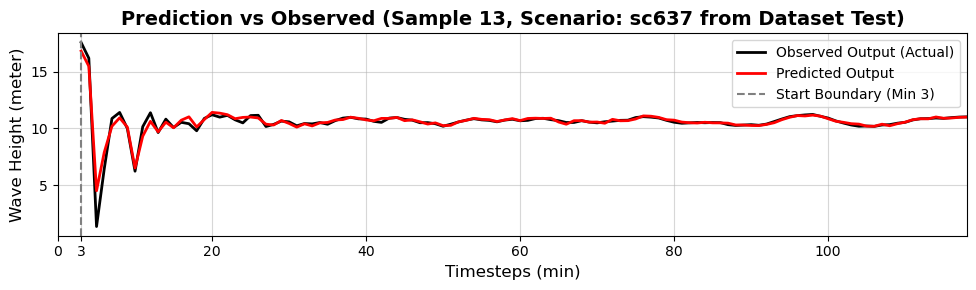

Sample 13 corresponds to scenario: sc637


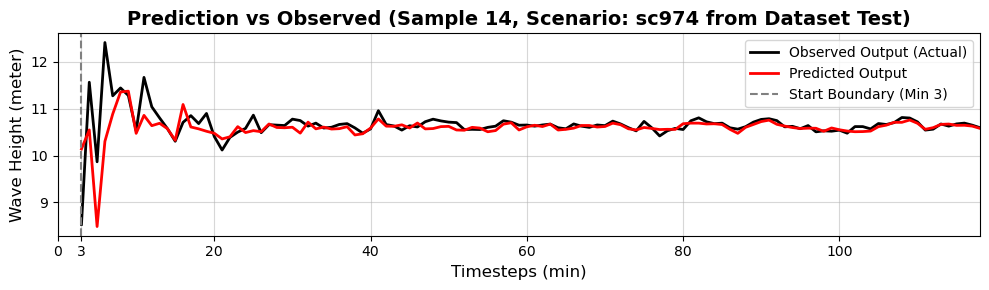

Sample 14 corresponds to scenario: sc974


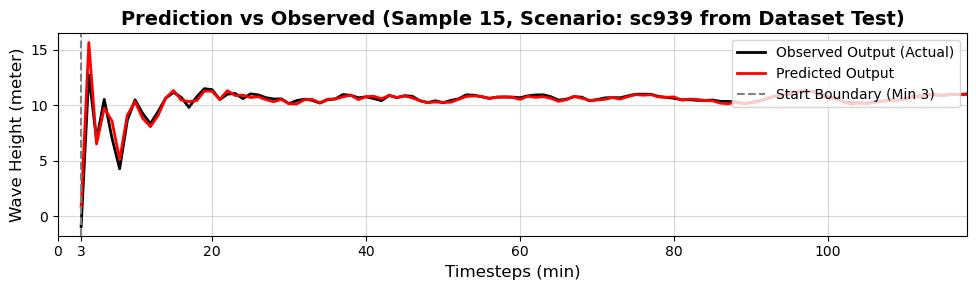

Sample 15 corresponds to scenario: sc939


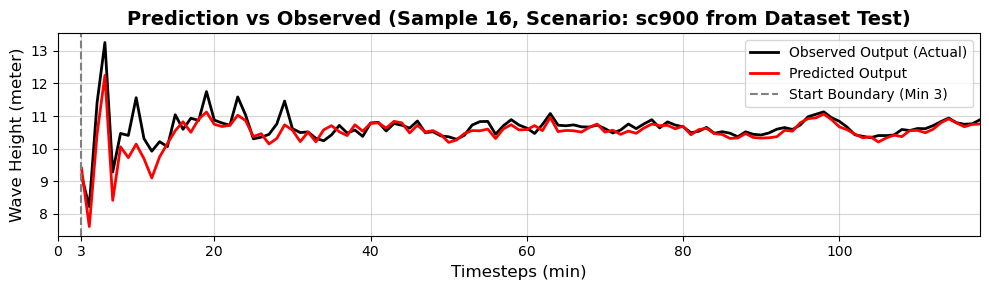

Sample 16 corresponds to scenario: sc900


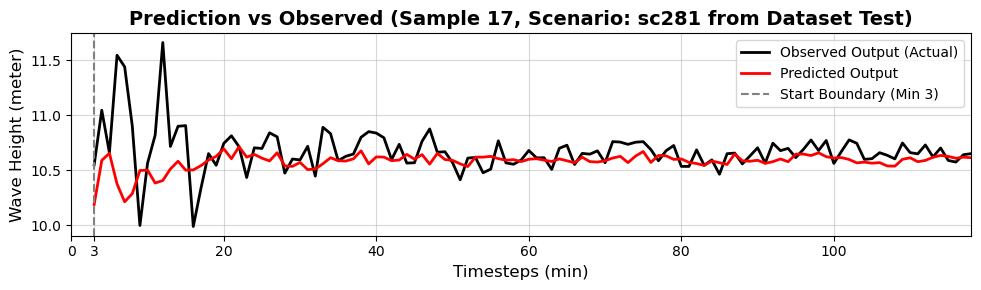

Sample 17 corresponds to scenario: sc281


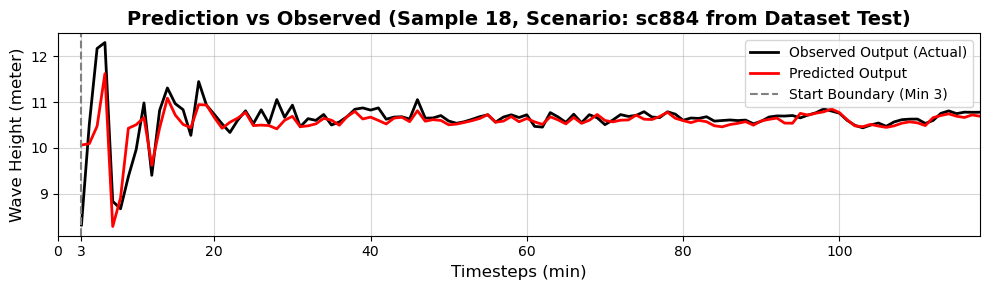

Sample 18 corresponds to scenario: sc884


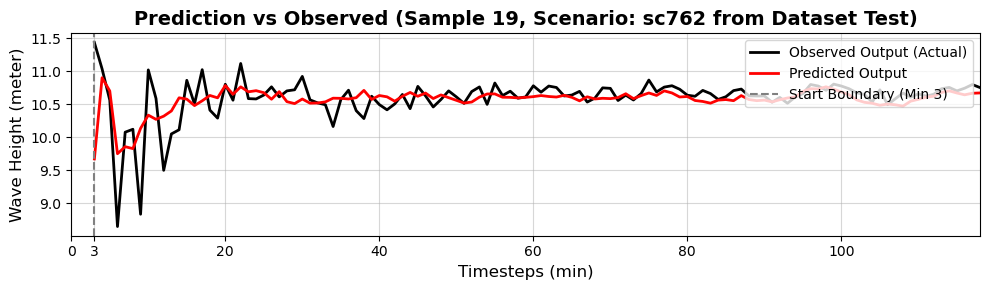

Sample 19 corresponds to scenario: sc762


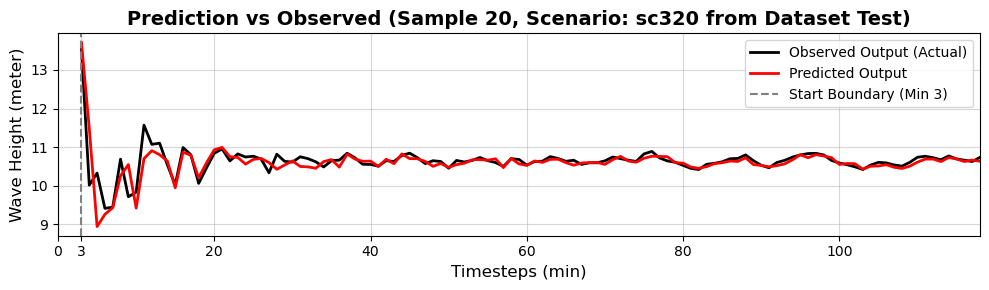

Sample 20 corresponds to scenario: sc320


In [14]:
import matplotlib.pyplot as plt

# Visualisasi untuk 10 sampel pertama
for i in range(20):  # Iterasi untuk 10 sampel pertama
    plt.figure(figsize=(10, 3))  # Ukuran plot: lebar 10 inch, tinggi 3 inch

    # Timestep awal (misalnya, mulai dari menit ke-3)
    start_timestep = 3  # Ubah sesuai kebutuhan
    adjusted_timesteps = range(start_timestep, start_timestep + output_seq_length)

    # Plot data observasi
    plt.plot(
        adjusted_timesteps,
        y_test[i],
        color='black',  # Garis hitam solid
        linestyle='-',  # Garis solid
        label="Observed Output (Actual)",
        linewidth=2
    )

    # Plot data prediksi
    plt.plot(
        adjusted_timesteps,
        y_pred[i],
        color='red',  # Garis merah solid
        linestyle='-',  # Garis solid
        label="Predicted Output",
        linewidth=2
    )

    # Tambahkan garis boundary untuk menit ke-3
    plt.axvline(
        x=start_timestep,  # Posisi garis boundary
        color='gray',
        linestyle='--',  # Garis putus-putus
        linewidth=1.5,
        label=f"Start Boundary (Min {start_timestep})"  # Label garis boundary
    )

    # Tambahkan notasi angka "3" di bawah garis boundary
    ticks = list(plt.xticks()[0])  # Ambil ticks otomatis
    ticks = [tick for tick in ticks if tick >= 0]  # Hapus nilai negatif
    ticks.append(start_timestep)  # Tambahkan timestep ke-3
    ticks = sorted(set(ticks))  # Pastikan unik dan terurut
    tick_labels = [str(int(tick)) if tick != start_timestep else "3" for tick in ticks]  # Ganti label timestep 3 menjadi "3"
    plt.xticks(ticks, tick_labels, fontsize=10)

    # Tambahkan elemen visualisasi
    scenario_name = scenario_ids_test[i]  # Ambil nama skenario untuk sampel ini
    plt.title(
        f"Prediction vs Observed (Sample {i+1}, Scenario: {scenario_name} from Dataset Test)",
        fontsize=14,
        fontweight='bold'
    )
    plt.xlabel("Timesteps (min)", fontsize=12)  # Label sumbu x
    plt.ylabel("Wave Height (meter)", fontsize=12)  # Label sumbu y
    plt.yticks(fontsize=10)  # Ukuran ticks y
    plt.legend(loc='upper right', fontsize=10)  # Legend dengan judul
    plt.grid(alpha=0.5)  # Tambahkan grid transparan
    plt.xlim(0, max(adjusted_timesteps))  # Atur batas sumbu X mulai dari 0

    # Tata letak rapi
    plt.tight_layout()

    # Simpan plot ke file (opsional)
    output_path = f"C:\\Users\\elmoe\\Desktop\\dataset 1000 scenarios volcanic tsunamis\\multistation-bilstm\\sta1\\Prediction_vs_Observed_Sample{i+1}.png"
    plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Simpan gambar dengan resolusi tinggi
    plt.show()

    print(f"Sample {i+1} corresponds to scenario: {scenario_name}")

# Langkah 9: Simpan Model
Setelah model dilatih dengan baik, Anda bisa menyimpannya untuk digunakan kembali tanpa harus melatih ulang.

# Simpan Model 

In [15]:
import os

# Tentukan path folder untuk menyimpan model
output_folder = r"C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1"
model_path = os.path.join(output_folder, "multi_station_bilstm_model.h5")

# Simpan model ke dalam folder yang ditentukan
model.save(model_path)
print(f"Model saved successfully at {model_path}")

Model saved successfully at C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1\multi_station_bilstm_model.h5


C:\Users\elmoe\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Muat Model
Jika Anda ingin memuat model untuk prediksi di masa mendatang

In [16]:
import os
from tensorflow.keras.models import load_model

# Tentukan path folder tempat model disimpan
output_folder = r"C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1"
model_path = os.path.join(output_folder, "multi_station_bilstm_model.h5")

# Muat model dari folder yang ditentukan
model = load_model(model_path)
print(f"Model loaded successfully from {model_path}")


Model loaded successfully from C:\Users\elmoe\Desktop\dataset 1000 scenarios volcanic tsunamis\multistation-bilstm\sta1\multi_station_bilstm_model.h5


# Langkah 10: Analisis Lanjutan
1. Bandingkan Prediksi untuk Skenario Berbeda:
Pisahkan hasil prediksi berdasarkan skenario (sc1, sc2, ..., sc1000) untuk melihat pola atau anomali.
2. Tambahkan Validasi Data Nyata:
Jika Anda memiliki data observasi nyata (real event), gunakan untuk membandingkan akurasi model dengan data simulasi.
3. Eksplorasi Model Lain:
Cobalah arsitektur model lainnya (misalnya, CNN-LSTM atau Transformer) untuk membandingkan hasil.
